In [5]:
import keras
import time
import matplotlib
import matplotlib.pyplot as plt

from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.datasets import mnist



# Load datasets and view the shape of the training and test dataset splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training data shape: ", x_train.shape) 
print("Training label shape: ", y_train.shape)

print("Test data shape", x_test.shape)
print("Test label shape: ", y_test.shape)

# Reshape the test and train labels datasets to avoid rank 1 arrays
y_train = y_train.reshape(len(y_train), 1)
print("Reshaped training label: ", y_train.shape)
y_test = y_test.reshape(len(y_test), 1)
print("Reshaped test label: ", y_test.shape)

# Flatten the images
flatten_image_size = x_train.shape[1] * x_train.shape[2] #Training and Test images should have the same dimensions
x_train = x_train.reshape(x_train.shape[0], flatten_image_size)
x_test = x_test.reshape(x_test.shape[0], flatten_image_size)

print("First 5 training labels: \n", y_train[:5])

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train[:5])

Training data shape:  (60000, 28, 28)
Training label shape:  (60000,)
Test data shape (10000, 28, 28)
Test label shape:  (10000,)
Reshaped training label:  (60000, 1)
Reshaped test label:  (10000, 1)
First 5 training labels: 
 [[5]
 [0]
 [4]
 [1]
 [9]]
First 5 training lables as one-hot encoded vectors:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [6]:
num_classes = 10 # Number of different outputs

model = Sequential([
    Dense(32, input_shape=(flatten_image_size,)),
    Activation('sigmoid'),
    Dense(64),
    Activation('sigmoid'),
    Dense(num_classes),
    Activation('softmax'),
])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 10us/step - loss: 2.2919 - acc: 0.1798 - val_loss: 2.2192 - val_acc: 0.3207
Epoch 2/10
54000/54000 [==============================] - 0s 7us/step - loss: 2.1881 - acc: 0.3807 - val_loss: 2.1520 - val_acc: 0.4495
Epoch 3/10
54000/54000 [==============================] - 0s 8us/step - loss: 2.1239 - acc: 0.4804 - val_loss: 2.0870 - val_acc: 0.5332
Epoch 4/10
54000/54000 [==============================] - 0s 7us/step - loss: 2.0633 - acc: 0.5371 - val_loss: 2.0269 - val_acc: 0.5823
Epoch 5/10
54000/54000 [==============================] - 0s 7us/step - loss: 2.0038 - acc: 0.5863 - val_loss: 1.9660 - val_acc: 0.6187
Epoch 6/10
54000/54000 [==============================] - 0s 9us/step - loss: 1.9439 - acc: 0.6143 - val_loss: 1.9044 - val_acc: 0.6513
Epoch 7/10
54000/54000 [==============================] - 0s 9us/step - loss: 1.8832 - acc: 0.6367 - val_loss: 1.8426 - val_acc: 0.680

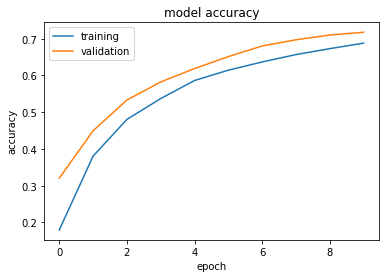

Test loss: 1.66
Test accuracy: 0.7


In [7]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=512, epochs=10, verbose=1, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')